In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from env import get_db_url
%matplotlib inline

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


1.  What does the distribution of petal lengths look like?

does not look like a normal distribution.  Perhaps kinda skewed but broken

<Axes: xlabel='petal_length', ylabel='Count'>

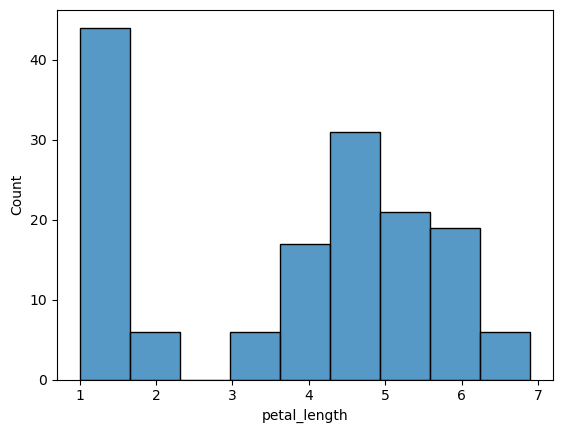

In [7]:
sns.histplot(iris.petal_length)  

<Axes: xlabel='petal_length', ylabel='Count'>

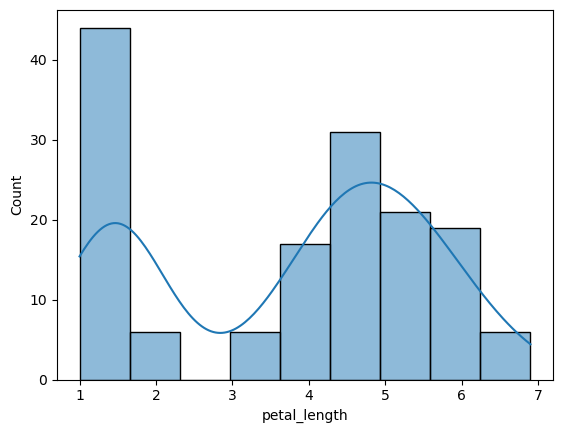

In [8]:
sns.histplot(iris.petal_length, kde=True)  

seems like a pretty strong linear relationship with a break between 2 and 3 on thwe width

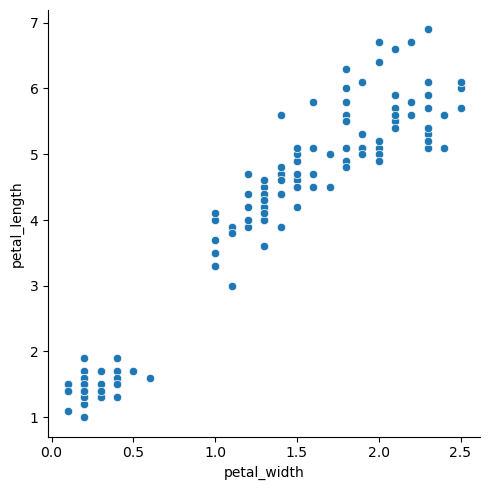

In [9]:
sns.relplot(x='petal_width', y='petal_length', data=iris) 

it would be a good starting point but there may be to much overlap

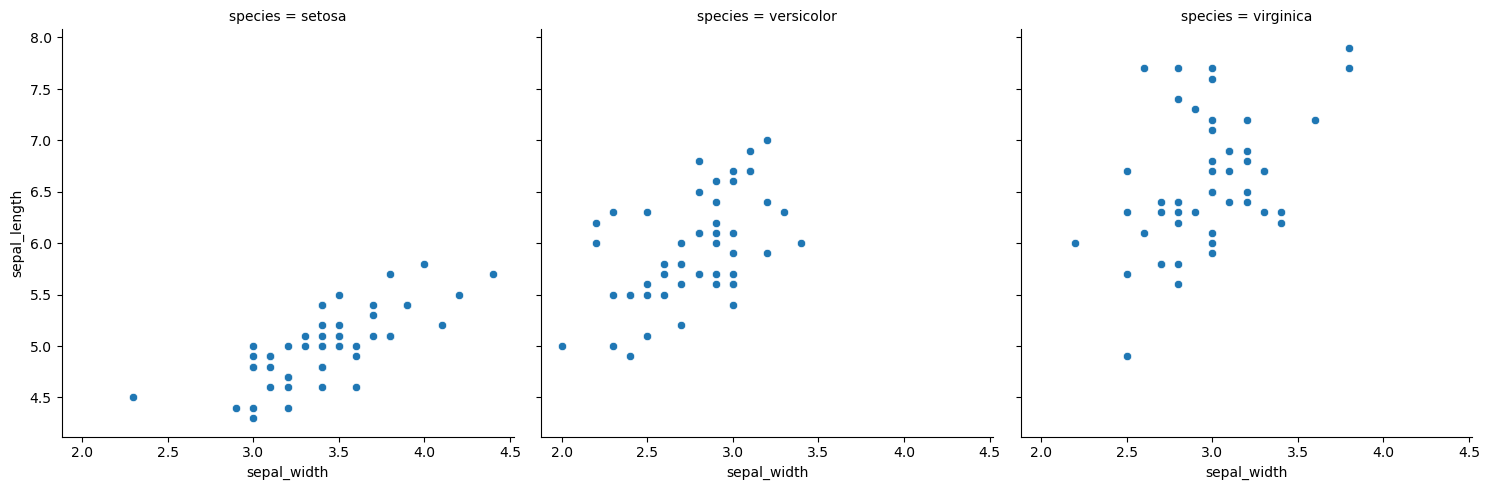

In [10]:
sns.relplot(x='sepal_width', y='sepal_length', col='species', data=iris)  

the hue makes the idea a little clearer.  It may be possible to isolate setosa based on sepal info but the other two are a bit tougher.  It also accounts for the gap in previous graphs

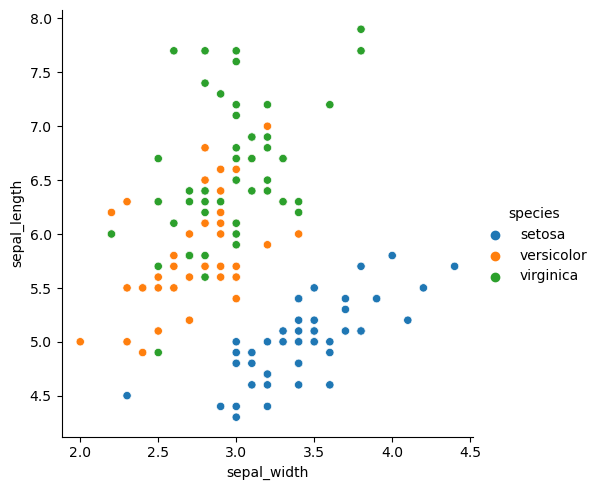

In [11]:
sns.relplot(x='sepal_width', y='sepal_length', hue='species', data=iris) 

Which features would be best used to predict species?

Overall size will separate out the setosa apecies particularly on the petal with and length measurements

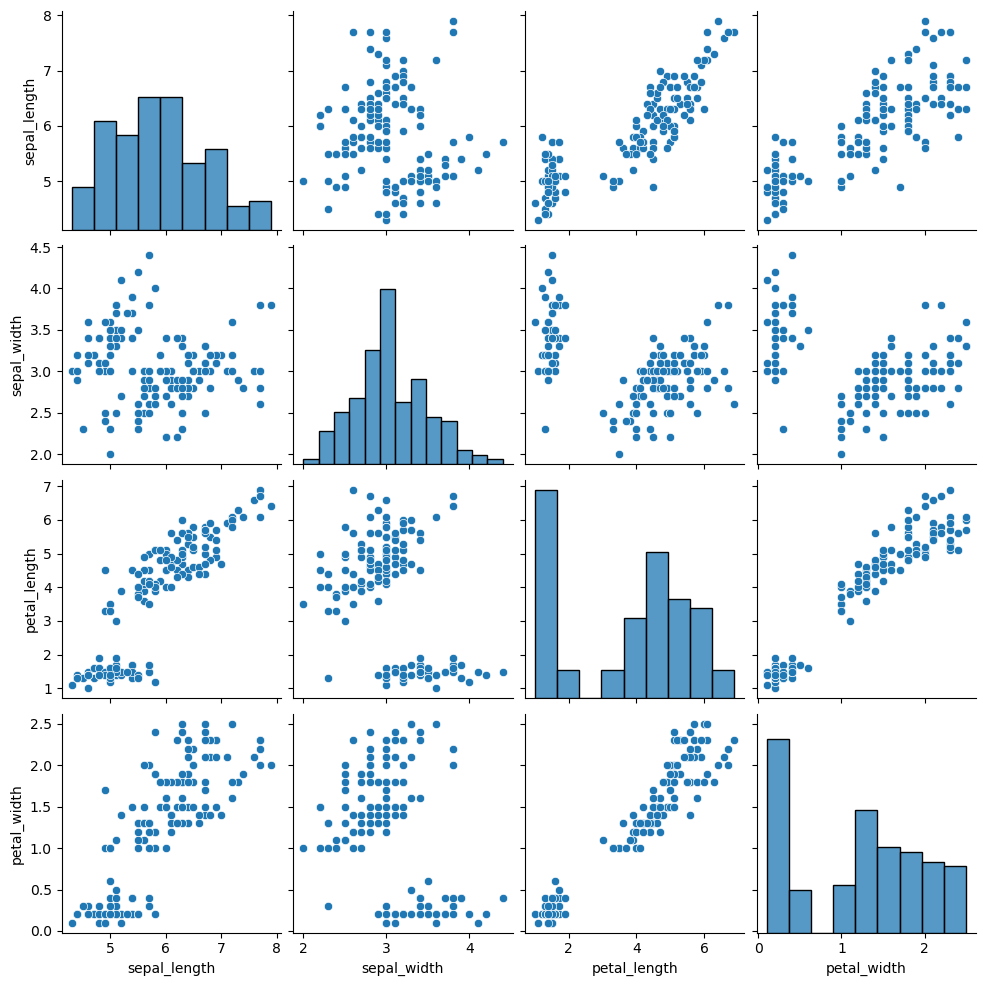

In [12]:
sns.pairplot(iris)

In [13]:
iris_two = iris[iris.species != 'setosa']

In [14]:
iris_two

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


at first it seemed untenable to separate the other two but adding a hue to it clearly shows that petal length to petal width ratio can be used here as a good starting point

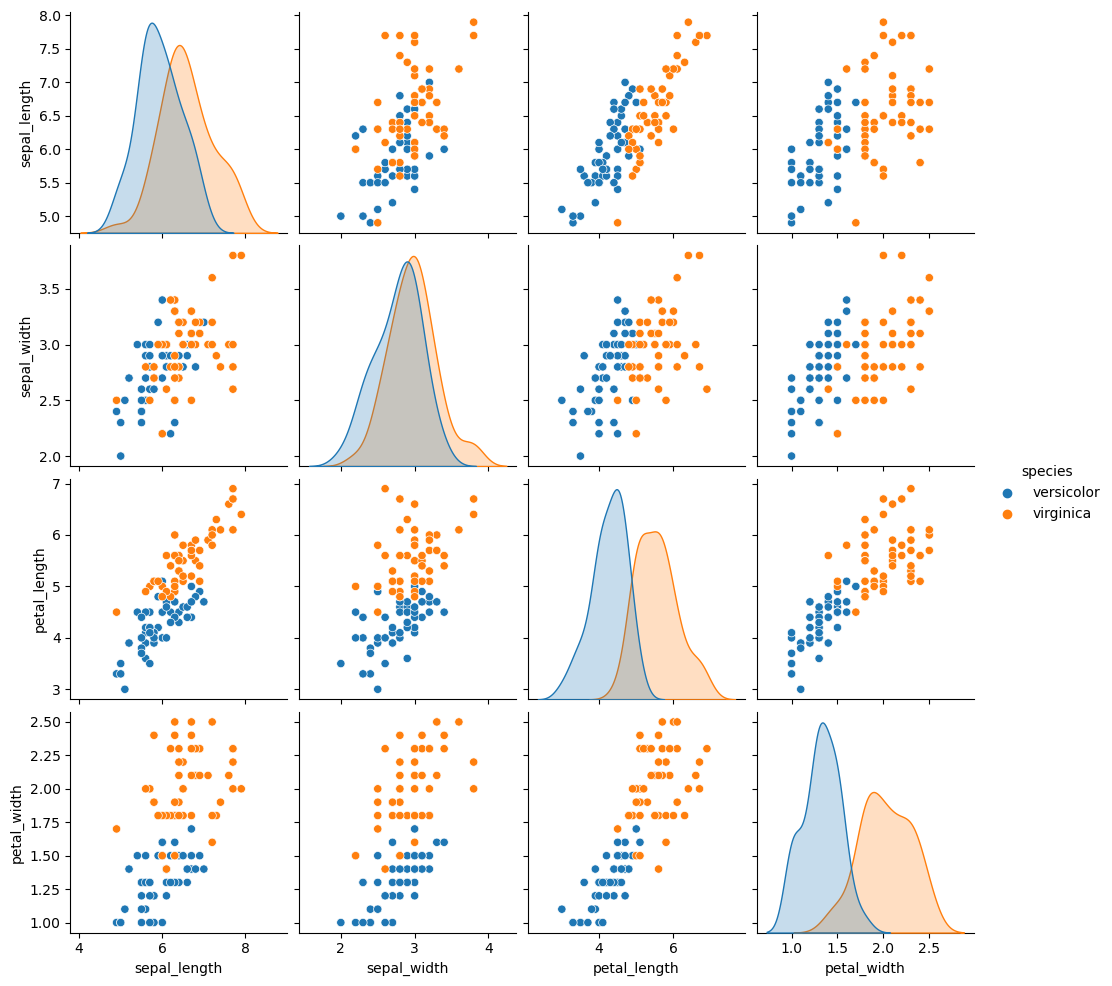

In [15]:
sns.pairplot(iris_two, hue='species') 

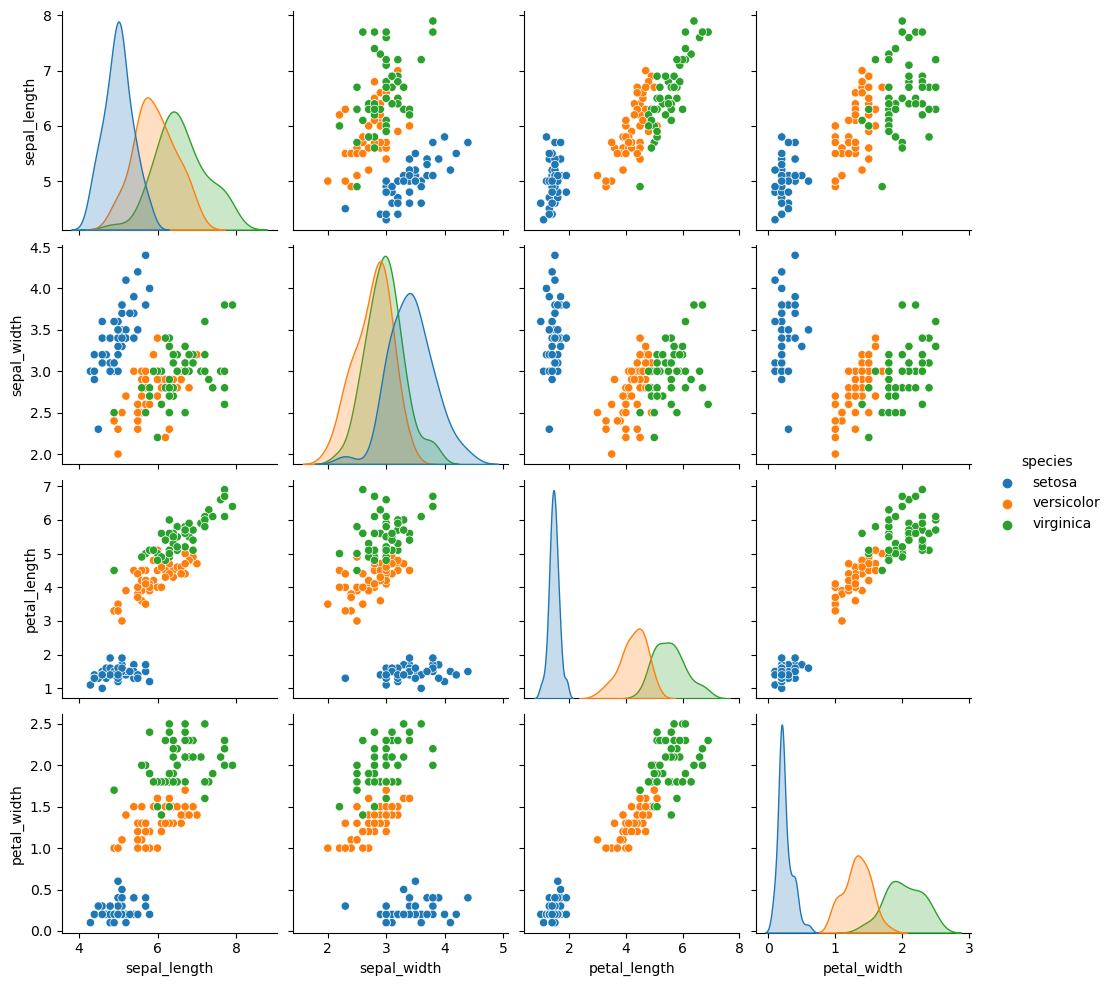

In [16]:
sns.pairplot(iris, hue='species')

rerunning the first pairplot with hue shows clear results.

Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [17]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


I notice the mean and standard deviation are the same which means this dataset is MADE UP!!!  HAH I FIGURED YOU GUYS OUT!!!  but the datapoints seem different

In [18]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

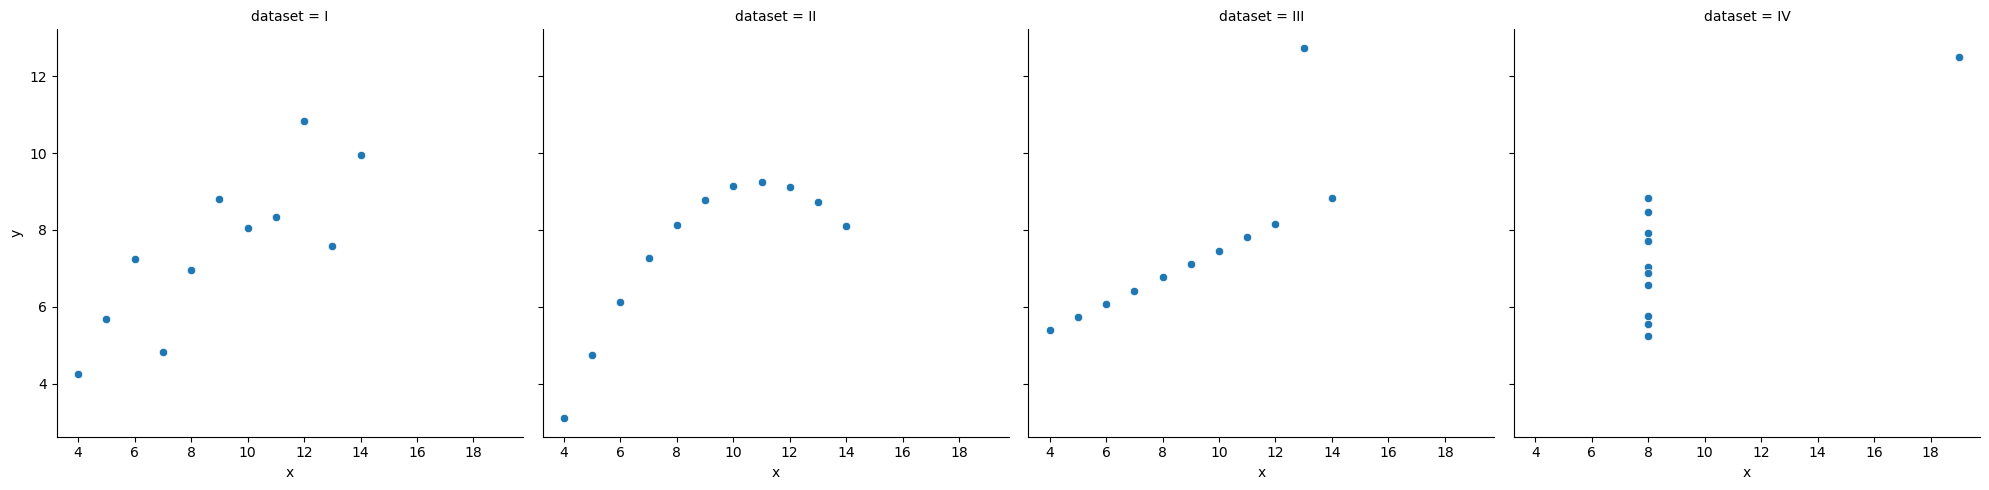

In [19]:
sns.relplot(x='x', y='y', col='dataset', data=anscombe)

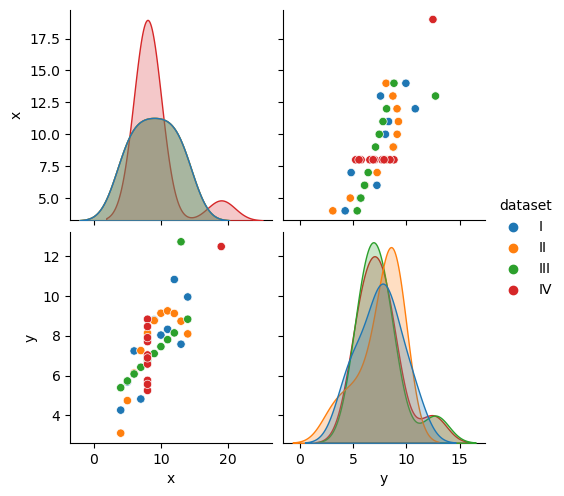

In [20]:
sns.pairplot(anscombe, hue='dataset') #just for fun

Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [21]:
InsectSprays_df = data('InsectSprays')

In [22]:
box = InsectSprays_df.groupby('spray').describe()

<Axes: xlabel='spray', ylabel='count'>

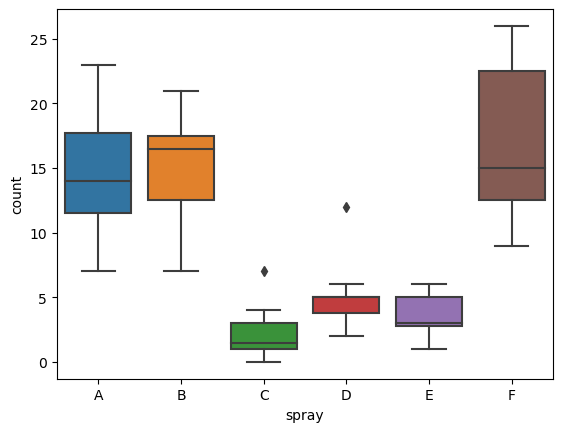

In [23]:
sns.boxplot(data=InsectSprays_df, x='spray', y='count')

In [24]:
InsectSprays_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:

In [25]:
swiss_df = data('swiss')

In [26]:
swiss_df

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [27]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [28]:
swiss_df[swiss_df.Catholic > 50]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4
Veveyse,87.1,64.5,14,6,98.61,24.5
Conthey,75.5,85.9,3,2,99.71,15.1
Entremont,69.3,84.9,7,6,99.68,19.8


In [29]:
swiss_df = swiss_df.assign(is_catholic = swiss_df.Catholic > 50)

In [30]:
swiss_df

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


In [31]:
swiss_df.groupby('is_catholic').describe()

Fertility                                                          \
                count       mean        std   min    25%    50%     75%   max   
is_catholic                                                                     
False            29.0  66.220690   9.613881  35.0  61.70  65.70  72.000  85.8   
True             18.0  76.461111  14.194702  42.8  71.75  79.35  83.625  92.5   

            Agriculture             ... Catholic         Infant.Mortality  \
                  count       mean  ...      75%     max            count   
is_catholic                         ...                                     
False              29.0  43.393103  ...   12.110   42.34             29.0   
True               18.0  62.366667  ...   99.035  100.00             18.0   

                                                                   
                  mean       std   min     25%   50%    75%   max  
is_catholic                                                        
False        19.565517  2.710466  10.8  18.000  20.0  21.00  23.8  
True         20.550000  3.197287  15.1  18.225  20.0  23.25  26.6  

[2 rows x 48 columns]

Does whether or not a province is Catholic influence fertility?

doesn't seem to have any corrleation looking at the scatterplot but the boxplot shows there may be an influence where being Catholic increases fertility

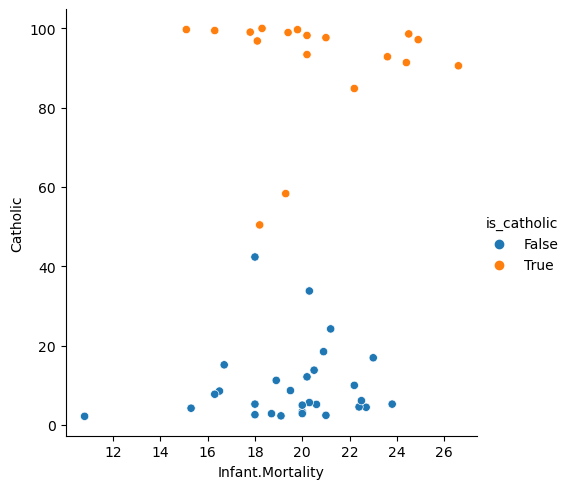

In [32]:
sns.relplot(x='Infant.Mortality', y='Catholic', hue='is_catholic', data=swiss_df) 

<Axes: xlabel='is_catholic', ylabel='Fertility'>

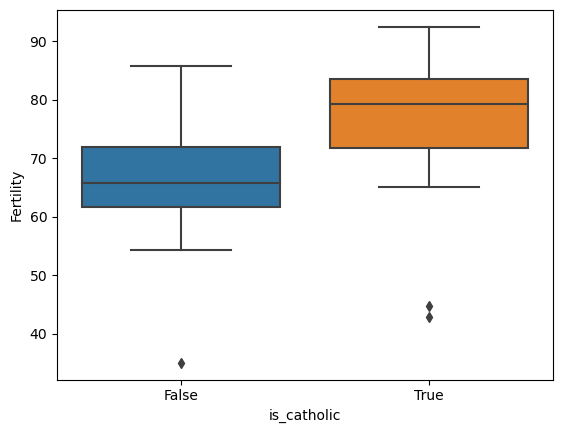

In [33]:
sns.boxplot(data=swiss_df, x='is_catholic', y='Fertility')

What measure correlates most strongly with fertility?

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


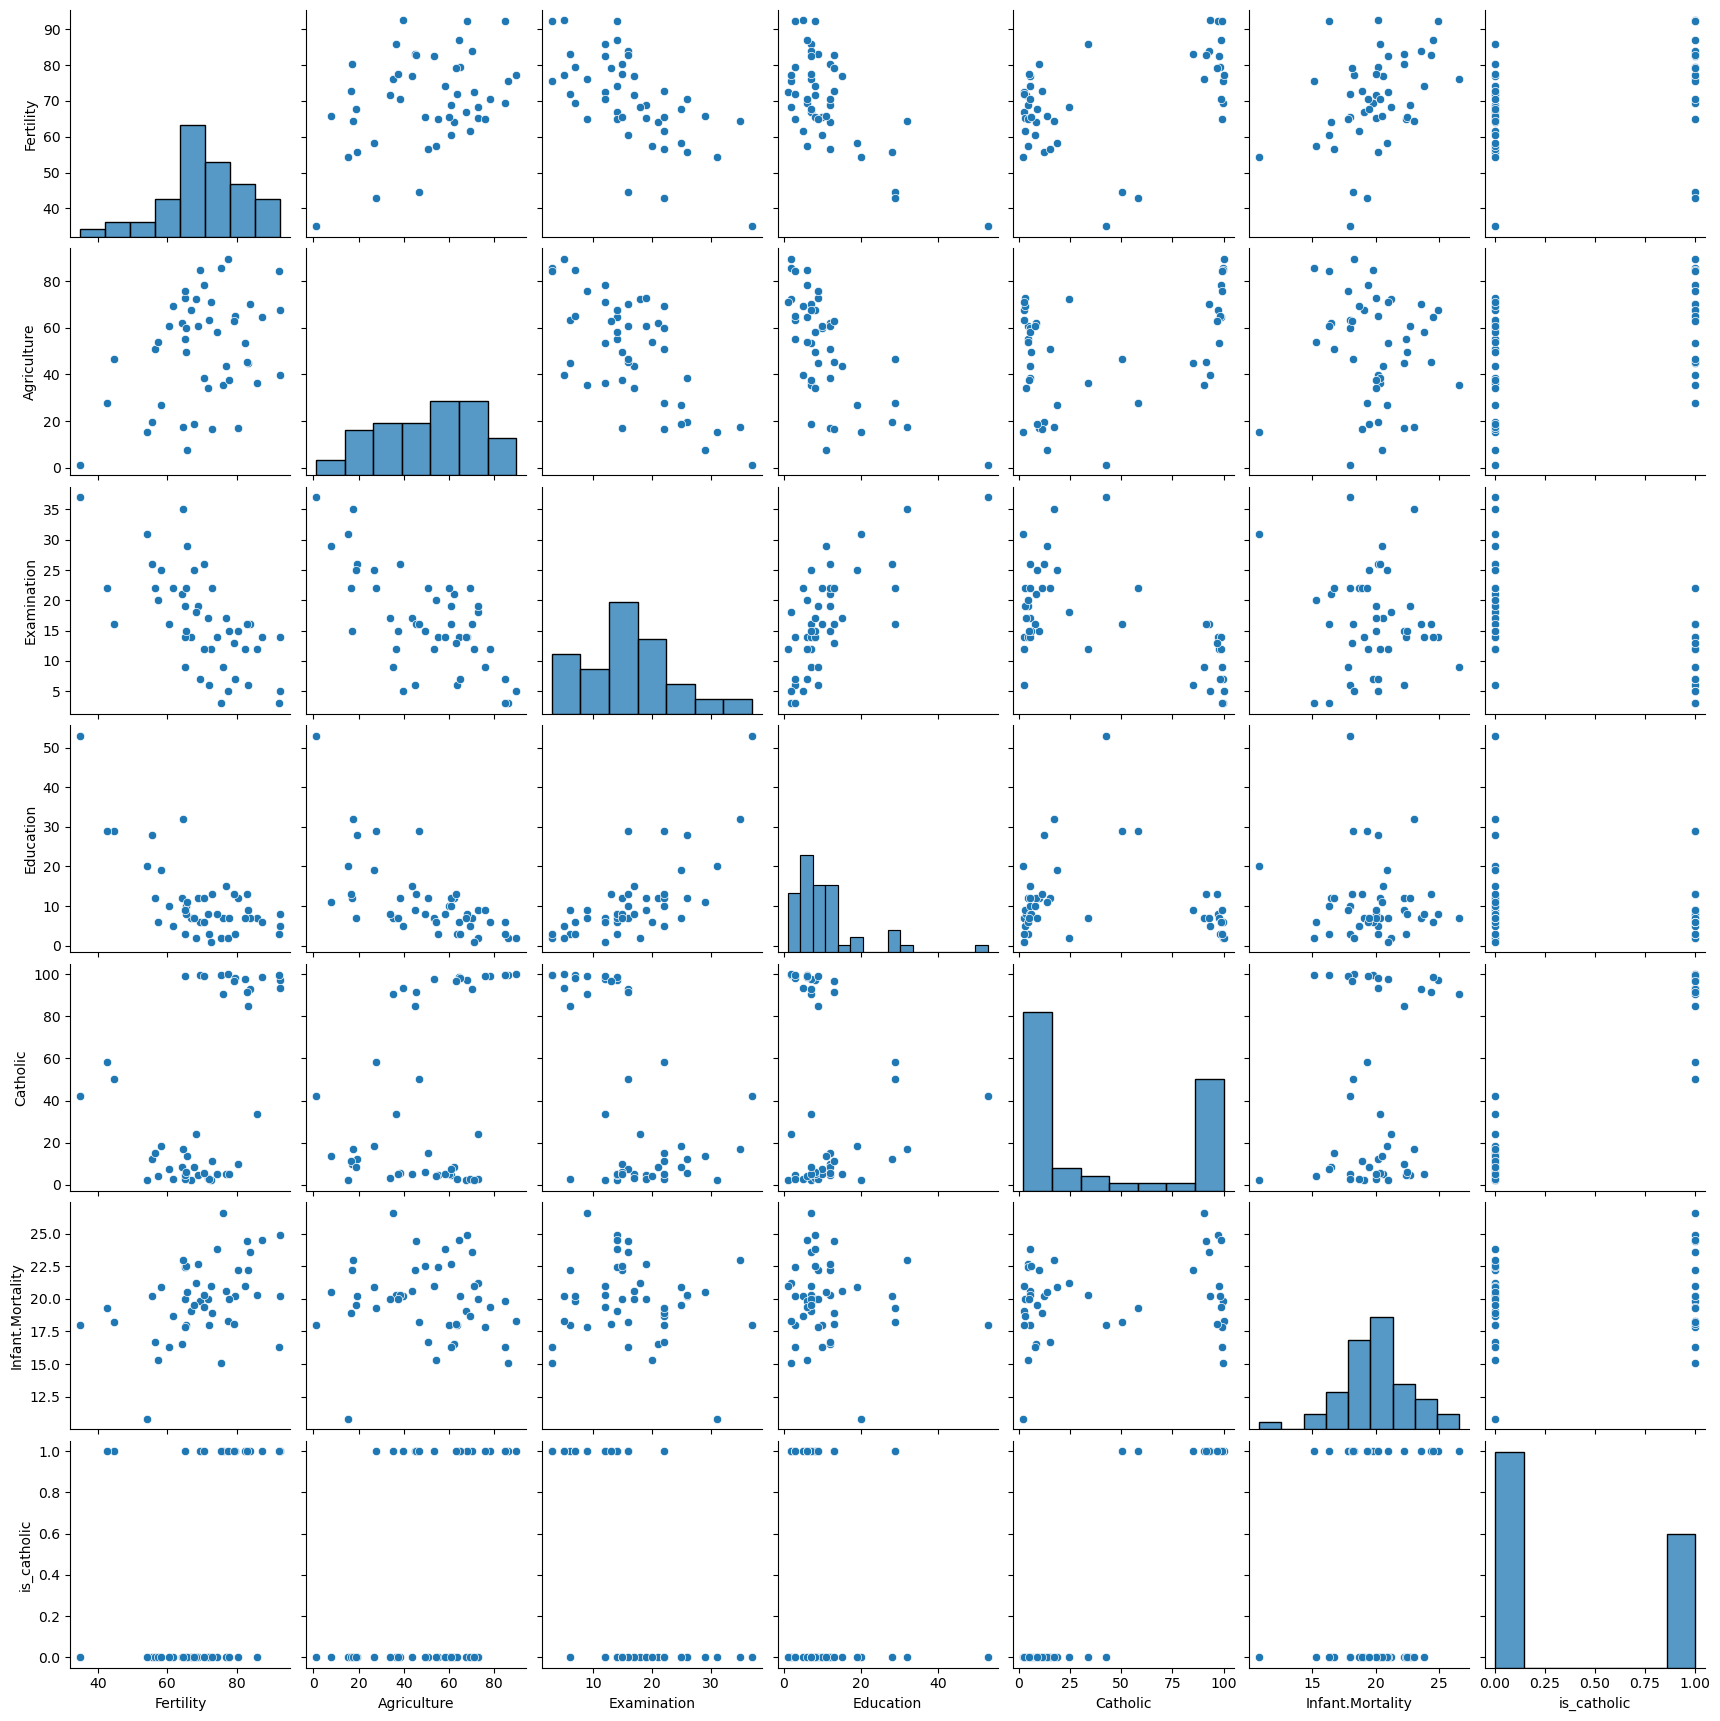

In [35]:
sns.pairplot(swiss_df)

Education and Examination seem most closely correlated to fertility

In [46]:
swiss_df.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [37]:
query ='''
SELECT *
FROM orders;
'''
chipotle_df = pd.read_sql(query, get_db_url('chipotle'))

In [38]:
chipotle_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [39]:
chipotle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [40]:
chipotle_df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [41]:
chipotle_df['item_price'] = chipotle_df.item_price.str.replace('$', '').astype('float')


/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_92078/3387299344.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle_df['item_price'] = chipotle_df.item_price.str.replace('$', '').astype('float')


In [42]:
chipotle_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


In [69]:
chipotle_df = chipotle_df.assign(total_revenue = chipotle_df.quantity * chipotle_df.item_price)

In [64]:
most_popular = chipotle_df.groupby('item_name').quantity.sum().sort_values(ascending=False).head(4)
most_popular

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [70]:
most_popular.index


Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [77]:
revenue = chipotle_df[chipotle_df.item_name.isin(most_popular.index)].groupby('item_name').total_revenue.sum().reset_index()
revenue

,item_name,total_revenue
0,Chicken Bowl,8044.63
1,Chicken Burrito,6387.06
2,Chips and Guacamole,2475.62
3,Steak Burrito,4236.13


<Axes: xlabel='item_name', ylabel='total_revenue'>

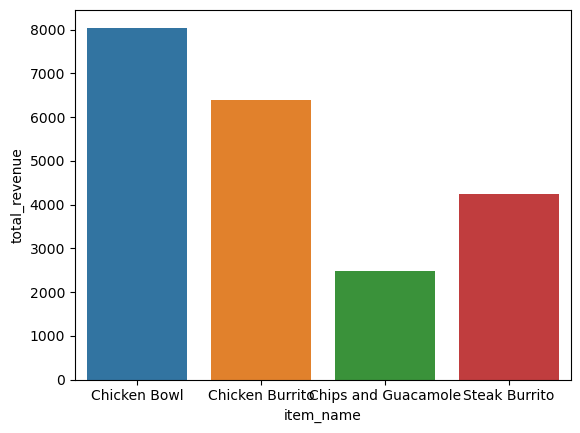

In [73]:
sns.barplot(x = 'item_name', y = 'total_revenue', data = revenue)

Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [78]:
sleepstudy = data('sleepstudy')
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [79]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

<Axes: xlabel='Days', ylabel='Reaction'>

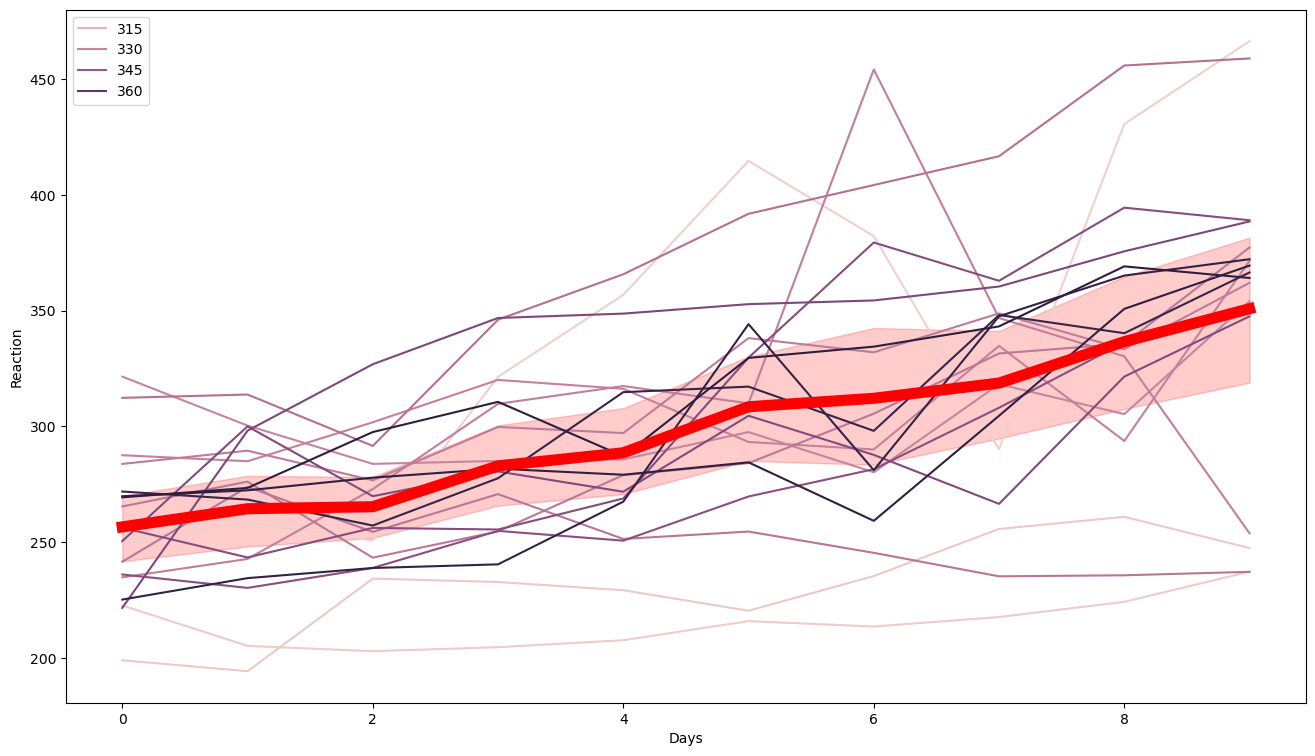

In [85]:
plt.figure(figsize=(16,9))


sns.lineplot(x='Days', y='Reaction', data=sleepstudy, hue = 'Subject')
sns.lineplot(x='Days', y='Reaction', data=sleepstudy, color='Red',estimator='mean', linewidth=8)

In [86]:
sleepstudy.groupby('Subject').describe()

Reaction                                                         \
           count       mean        std       min         25%        50%   
Subject                                                                   
308         10.0  342.13383  79.821763  249.5600  266.565675  339.14585   
309         10.0  215.23298  10.812193  202.9778  205.878375  214.79605   
310         10.0  231.00127  21.855996  194.3322  222.670275  233.58080   
330         10.0  303.22142  22.909199  280.2396  285.299075  298.99285   
331         10.0  309.43605  27.242607  285.0000  290.885925  297.78375   
332         10.0  307.30207  64.306126  234.8606  258.638625  309.88320   
333         10.0  316.15831  30.068208  276.7693  291.459000  315.91810   
334         10.0  295.30205  41.855607  243.3647  268.155125  281.60780   
335         10.0  250.07004  13.833852  235.3110  238.337025  248.45210   
337         10.0  375.72101  59.623789  291.6112  321.884900  378.78545   
349         10.0  275.83447  42.937942  230.3167  241.871775  262.34820   
350         10.0  313.60268  63.360558  243.4543  256.227650  299.32060   
351         10.0  290.09775  28.978811  250.5265  270.377275  284.16785   
352         10.0  337.42154  47.602380  221.6771  331.872750  350.78445   
369         10.0  306.03464  37.460429  257.2424  273.356775  306.47875   
370         10.0  291.70177  59.208212  225.2640  239.293850  274.34270   
371         10.0  294.98404  36.505989  259.2658  273.806825  280.48000   
372         10.0  317.88613  35.822804  269.4117  289.778650  320.11960   

                               Days                                           
                75%       max count mean      std  min   25%  50%   75%  max  
Subject                                                                       
308      406.568525  466.3535  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
309      221.482225  237.3142  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
310      244.491675  261.0125  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
330      315.033350  354.0487  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
331      319.155800  371.5811  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
332      327.090950  454.1619  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
333      336.964875  362.0428  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
334      325.023375  377.2990  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
335      254.599825  273.9472  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
337      413.584250  458.9167  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
349      301.467700  351.6451  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
350      375.312975  394.4872  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
351      303.489600  347.5655  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
352      358.931100  388.5417  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
369      334.513375  366.5131  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
370      346.737550  372.2288  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
371      299.600950  369.4692  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
372      341.035375  369.1417  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0

In [ ]:
sns.lineplot(x = 'Subject', y='Reaction', hue='Subject' data=sleepstudy)
